In [1]:
import numpy as np
import pandas as pd

# Проблема Монти Холла

<a href="https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BE%D0%BA%D1%81_%D0%9C%D0%BE%D0%BD%D1%82%D0%B8_%D0%A5%D0%BE%D0%BB%D0%BB%D0%B0">Проблема Монти Холла</a> годами волновала многих, включая математиков. Давайте посмотрим, сможем ли мы решить ее с помощью моделирования.

Условия взяты из телевизионного игрового шоу под названием "Давайте заключим сделку". Монти Холл запустил это шоу в 1960-х, и впоследствии на его основе возникло множество подобных шоу. Самой захватывающей частью было то, что, хотя у участников была возможность выиграть отличные призы, они могли вместо них получить нежелательные "сюрпризы". Это была основа того, сейчас называется проблемой Монти Холла.

Место действия представляет собой игровое шоу, в котором участник встречается с тремя закрытыми дверями. За одной из дверей стоит шикарная машина, а за остальными двумя находятся козлы. Участник не знает, где автомобиль, и должен попытаться найти его по следующим правилам.

- Участник делает первоначальный выбор, но эта дверь не открывается.

- По крайней мере за одной из двух других дверей должен быть козел. Монти открывает одну из этих дверей, чтобы показать козла. Этот козел во всех красках описан в Википедии:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/1280px-Monty_open_door.svg.png)

- Остается две двери, одну из которых первоначально выбрал участник. За одной из них автомобиль, за другой — козел. Теперь участник может выбрать, какую из двух дверей открыть.

Участник должен принять решение. Какую дверь он должен открыть, если хочет автомобиль? Должен ли он придерживаться своего первоначального выбора или переключиться на другую дверь? Это и есть проблема Монти Холла.

## Решение
В любой проблеме, связанной с вероятностями, важную роль играют допущения о случайности. Разумно предположить, что с вероятностью 1/3 автомобиль находится за дверью, первоначально выбранной участником.

Исходя из этого предположения, решение проблемы довольно простое, хотя простое решение убеждает не всех. В любом случае вот оно.

- Вероятность того, что автомобиль находится за первоначально выбранной дверью, составляет 1/3.
- Автомобиль находится либо за первоначально выбранной дверью, либо за оставшейся дверью. Он не может быть где-нибудь еще.
- Следовательно, вероятность того, что машина находится за оставшейся дверью, составляет 2/3.
- Поэтому участник должен переключиться на другую дверь.

Вот и все. Конец истории.

Не убеждены? Тогда давайте смоделируем игру и посмотрим, какие получатся результаты.

## Моделирование
Это моделирование будет более сложным, чем те, что мы делали до сих пор. Давайте разберемся.

### Шаг 1. Что нужно моделировать
Для каждой игры мы будем моделировать то, что находится за всеми тремя дверями: за той, которую сначала выбирает участник, за той, которую открывает Монти, и за оставшейся дверью.

Таким образом, мы будем отслеживать не одну, а три величины.

### Шаг 2. Моделирование одного раунда
Основная часть нашей работы заключается в моделировании одного раунда игры. Оно состоит из нескольких частей.

### Козлы
Мы начнем с настройки массива `goats`, который содержит обычные имена для двух козлов.

In [3]:
goats = np.array(['first goat', 'second goat'])

Чтобы помочь Монти провести игру, нам нужно будет определить, какой козел выбирается и какой обнаруживается за открытой дверью. Функция `other_goat` берет одного козла и возвращает другого.

In [4]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

Давайте проверим, работает ли функция.

In [5]:
other_goat('first goat'), other_goat('second goat'), other_goat('watermelon')

('second goat', 'first goat', None)

Строка _watermelon_ не является именем одного из козлов, поэтому, когда в функцию `other_goat` вводится *watermelon*, она ничего не делает.

### Параметры
Массив `hidden_behind_doors` содержит множество вещей, которые могут быть за дверями.

In [6]:
hidden_behind_doors = np.array(['car', 'first goat', 'second goat'])

Теперь мы готовы смоделировать одну игру. Для этого мы определим функцию monty_hall_game, которая не принимает аргументы. Когда эта функция вызывается, она играет в игру Монти один раз и возвращает список, состоящий из:

- предположения участника;
- того, что показывает Монти, когда открывается дверь;
- того, что остается за другой дверью.

Игра начинается с того, что участник выбирает одну дверь наугад. При этом участник делает случайный выбор из автомобиля, первого козла и второго козла.

Если участник выберет одного из козлов, то будет показан другой козел, а автомобиль окажется за оставшейся дверью.

Если участник случайно выбирает автомобиль, то Монти показывает одного из козлов, а другой козел будет за оставшейся дверью.

In [7]:
def monty_hall_game():
    """Return
    [contestant's guess, what Monty reveals, what remains behind the other door]"""

    contestant_guess = np.random.choice(hidden_behind_doors)

    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']

    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']

    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

Давайте сыграем! Запустим ячейку несколько раз и посмотрим, как изменяются результаты.

In [8]:
monty_hall_game()

['car', 'first goat', 'second goat']

## Шаг 3. Количество повторений
Чтобы измерить частоту, с которой возникают разные результаты, нам нужно много раз сыграть в игру и собрать результаты. Давайте запустим 10 000 повторений.

## Шаг 4. Создание кода модели
Настало время запустить всю модель.

Мы сыграем в игру 10 000 раз и соберем результаты в таблицу. Каждая строка таблицы будет содержать результат одной игры.

Один из способов увеличить таблицу путем добавления новой строки — использовать метод append. Если `my_table` — это таблица, а `new_row` — список, содержащий записи в новой строке, то `my_table.append(new_row)` добавляет новую строку в конец `my_table`.

Метод `append` не создает новую таблицу. Он изменяет `my_table`, и в ней становится на одну строку больше, чем раньше.

Сначала давайте создадим таблицу `games` тремя пустыми столбцами. Мы можем сделать это, просто указав список меток столбцов, как показано ниже.

In [50]:
games = pd.DataFrame(columns=['Guess', 'Revealed', 'Remaining'], index=np.arange(10000))

Обратите внимание, что мы выбрали порядок столбцов, совпадающий с порядком, в котором `monty_hall_game` возвращает результат одной игры.

Теперь мы можем добавить 10 000 строк в `trials`. Каждая строка будет представлять результат одного раунда игры Монти.

In [51]:
# Play the game 10000 times and
# record the results in the table games

for i in np.arange(10000):
    games.loc[i] = monty_hall_game()

Моделирование выполнено. Обратите внимание, насколько короткий код у нас получился. Большая часть работы была выполнена при моделировании результатов одного раунда.

## Визуализация
Чтобы увидеть, должен ли участник придерживаться своего первоначального выбора или изменить его, давайте посмотрим, как часто автомобиль оказывается за каждым из двух вариантов.

In [78]:
original_choice = games.groupby('Guess').size()
original_choice

Guess
car            3438
first goat     3268
second goat    3294
dtype: int64

In [79]:
remaining_door = games.groupby('Remaining').size()
remaining_door

Remaining
car            6562
first goat     1783
second goat    1655
dtype: int64

Как говорилось в нашем предыдущем решении, автомобиль находится за оставшейся дверью в двух третях случаев, в весьма хорошем приближении. Участник получает в два раза больше шансов получить машину, если изменяет свой выбор, чем если придерживается первоначального выбора.

Чтобы увидеть это графически, мы можем объединить две таблицы выше и нарисовать наложенные гистограммы.

In [86]:
joined = pd.concat([original_choice, remaining_door], axis=1) \
                                         .rename(columns={0: 'Original Door',
                                                          1: 'Remaining Door'})
joined

,Original Door,Remaining Door
car,3438,6562
first goat,3268,1783
second goat,3294,1655


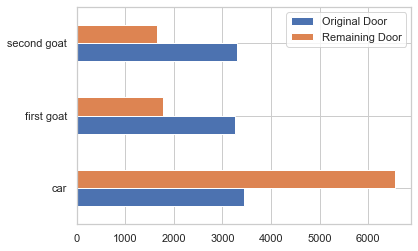

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

ax = joined.plot.barh();

Обратите внимание, что три синие полосы почти равны — исходный выбор с равной вероятностью может оказаться любым из трех доступных элементов. Но оранжевая полоса, соответствующая `car`, в два раза длиннее синей.

Моделирование подтверждает, что у участника в два раза больше шансов на победу, если он изменит свой выбор.